In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pylab as plt

from image_analysis.read_files import get_paths, change_paths
from image_analysis.fit import plot, roi
from image_analysis.preprocess import mask

In [3]:
pixel_size = 2

In [4]:
folder_pretreated = r'/home/natalia/Documents/github_image_analysis/experimental_data/treatment_all/'
df = pd.read_excel("../images.xlsx")

In [5]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm","Average animal size inside each group, cm",Unnamed: 6,Unnamed: 7
0,hcr11_lb27_fl,11,development,development,NaN,NaN,NaN,NaN
1,hcr11_lb28_fl,11,development,development,NaN,NaN,NaN,NaN
2,hcr15_lb41_fl,15,development,development,NaN,NaN,NaN,NaN
3,hcr16_lb44_fl,16,development,development,NaN,NaN,NaN,NaN
4,hcr16_lb45_fl,16,development,development,NaN,NaN,NaN,NaN


# Preview

In [6]:
set( df['Animal size, cm'].values )

{3, 5, 7, 'development'}

## Limb buds

In [7]:
df_to_plot = df[df['Animal size, cm'] == 'development']

In [8]:
keys_dpa = set( [str(h) for h in df_to_plot['HCR'].values] )
keys_dpa

{'11', '15', '16', '17', '20', '21', '22', '23'}

In [9]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['HCR'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['Sample name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )

        # mean projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:67: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:69: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


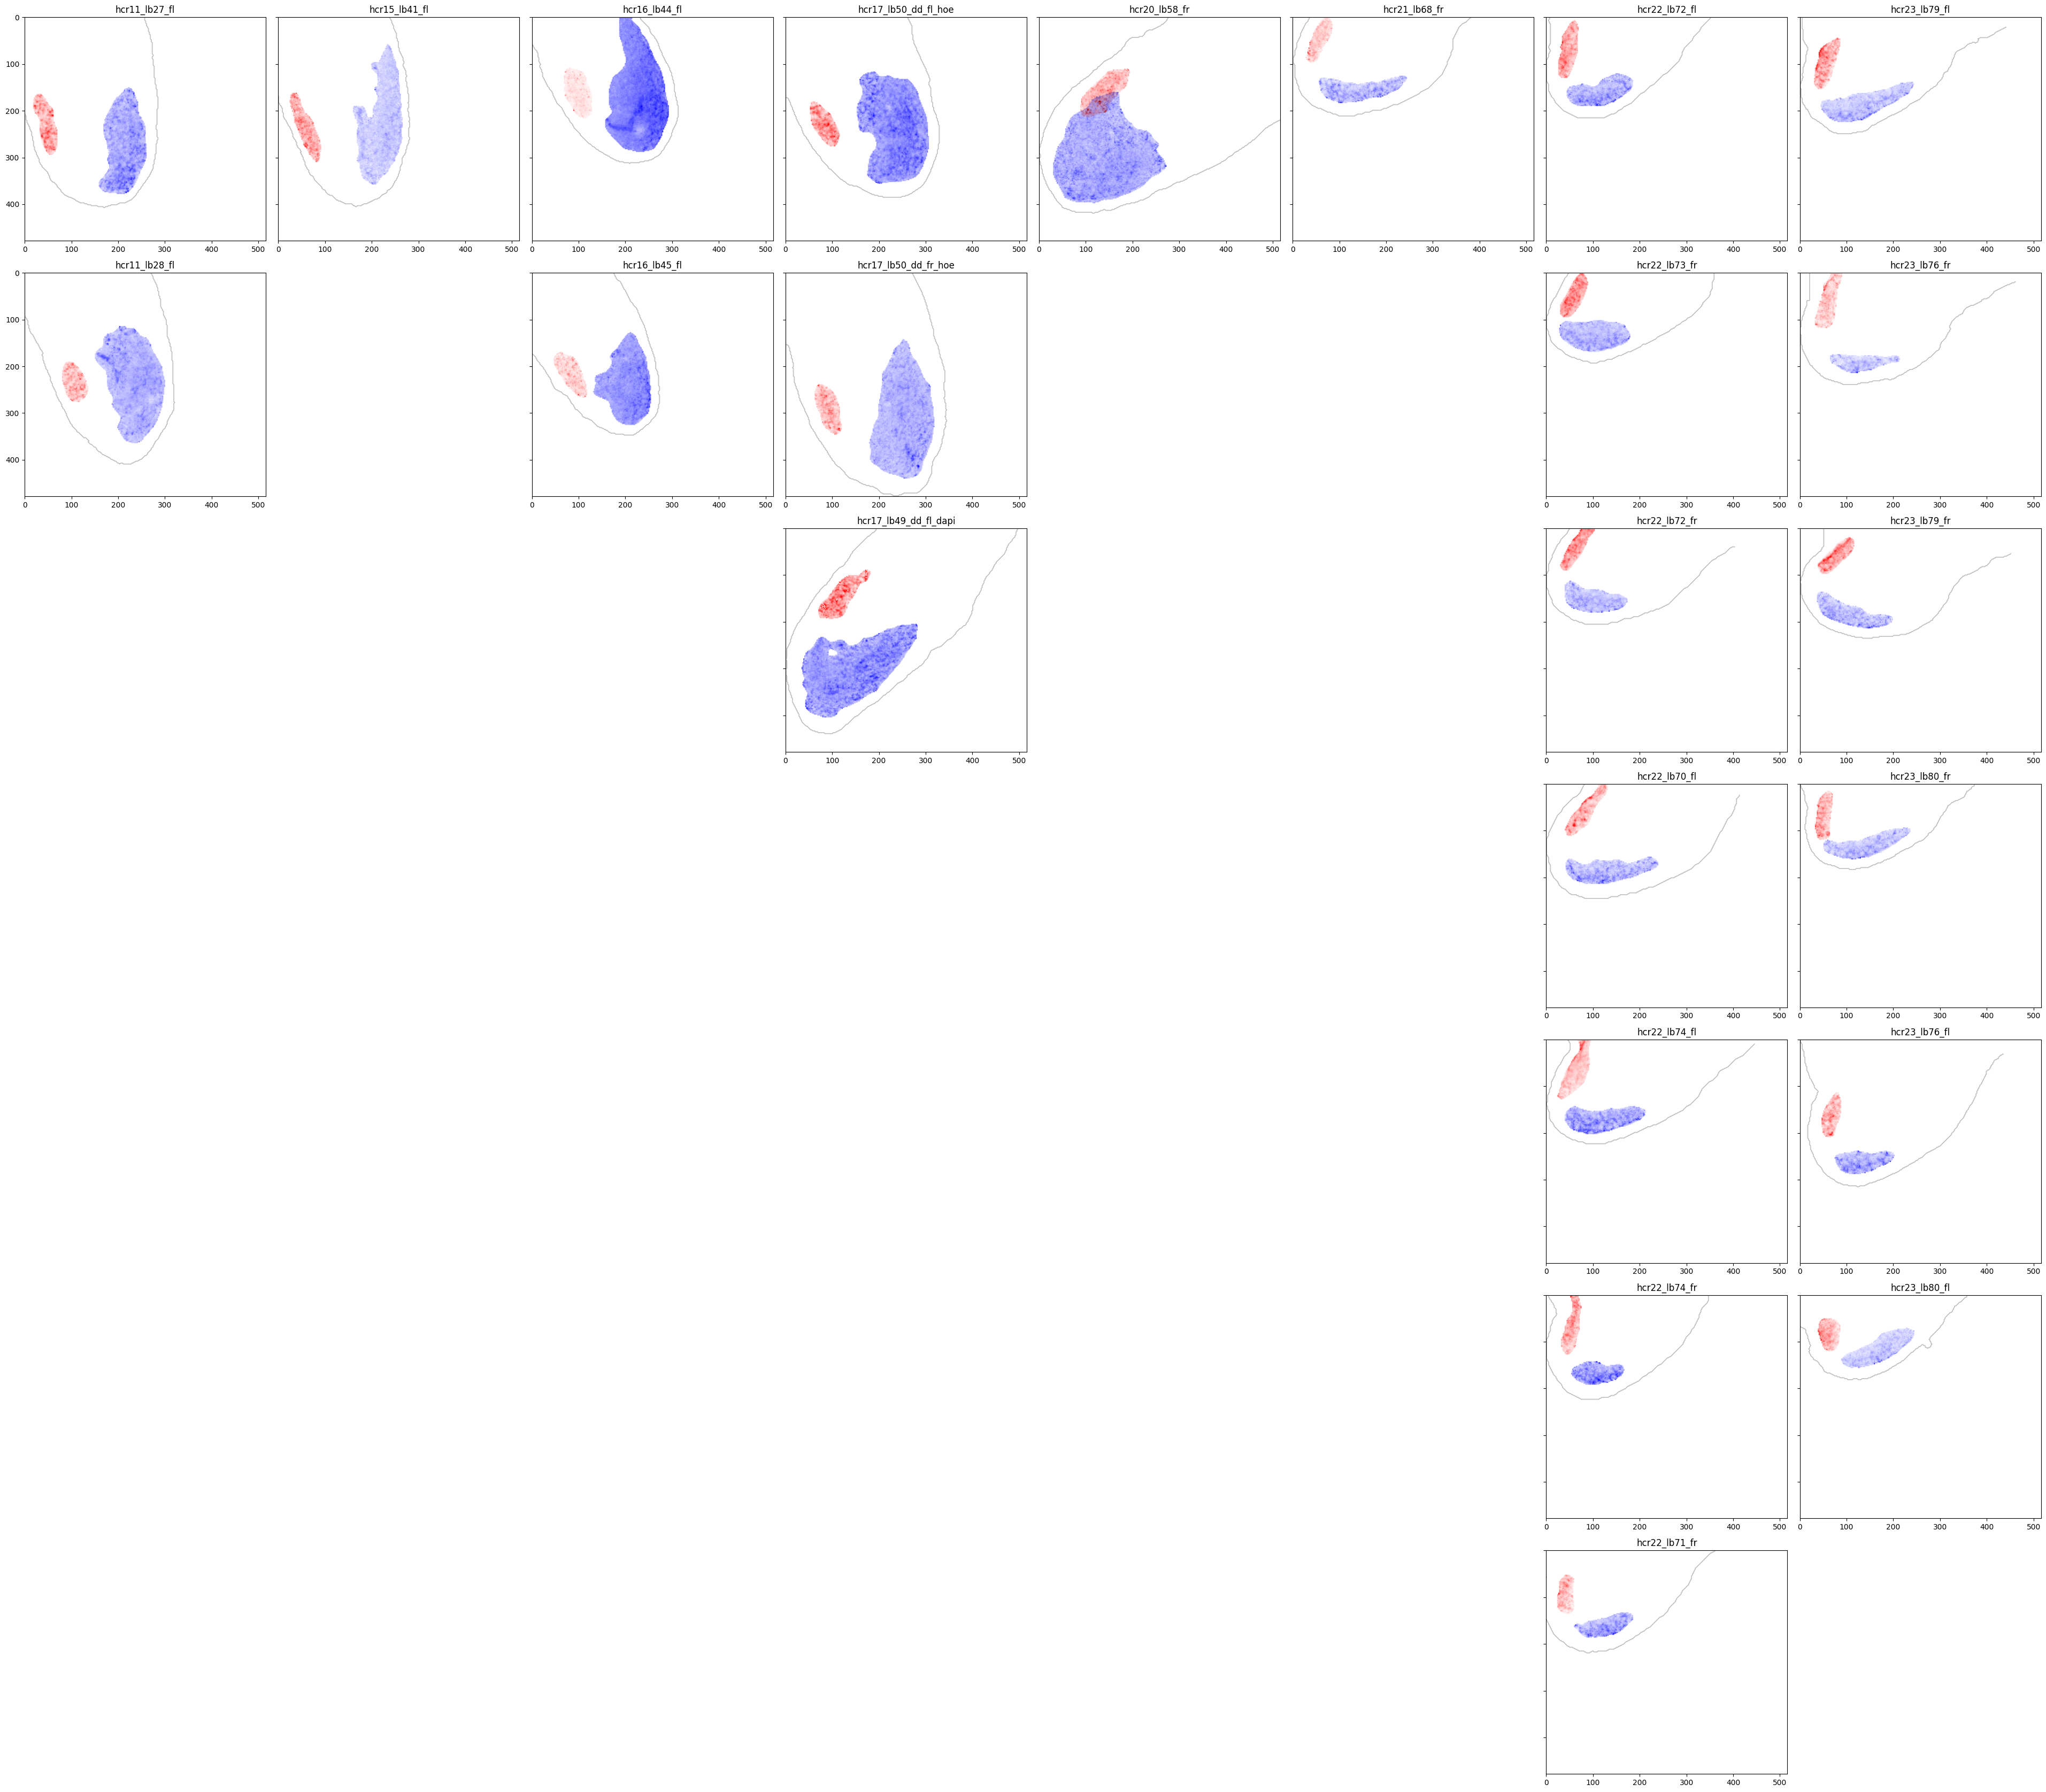

In [10]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('fig/limb_buds.pdf')
plt.show()

## 2.5 cm blastemas

In [11]:
df_to_plot = df[df['Animal size, cm'] == 3]

In [12]:
len(df_to_plot)

7

In [13]:
keys_dpa = set( [str(h) for h in df_to_plot['Regeneration time, dpa'].values] )
keys_dpa

{'4', '5', '6', '7'}

In [14]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['Regeneration time, dpa'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['Sample name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )            

        # mean projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:67: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:69: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


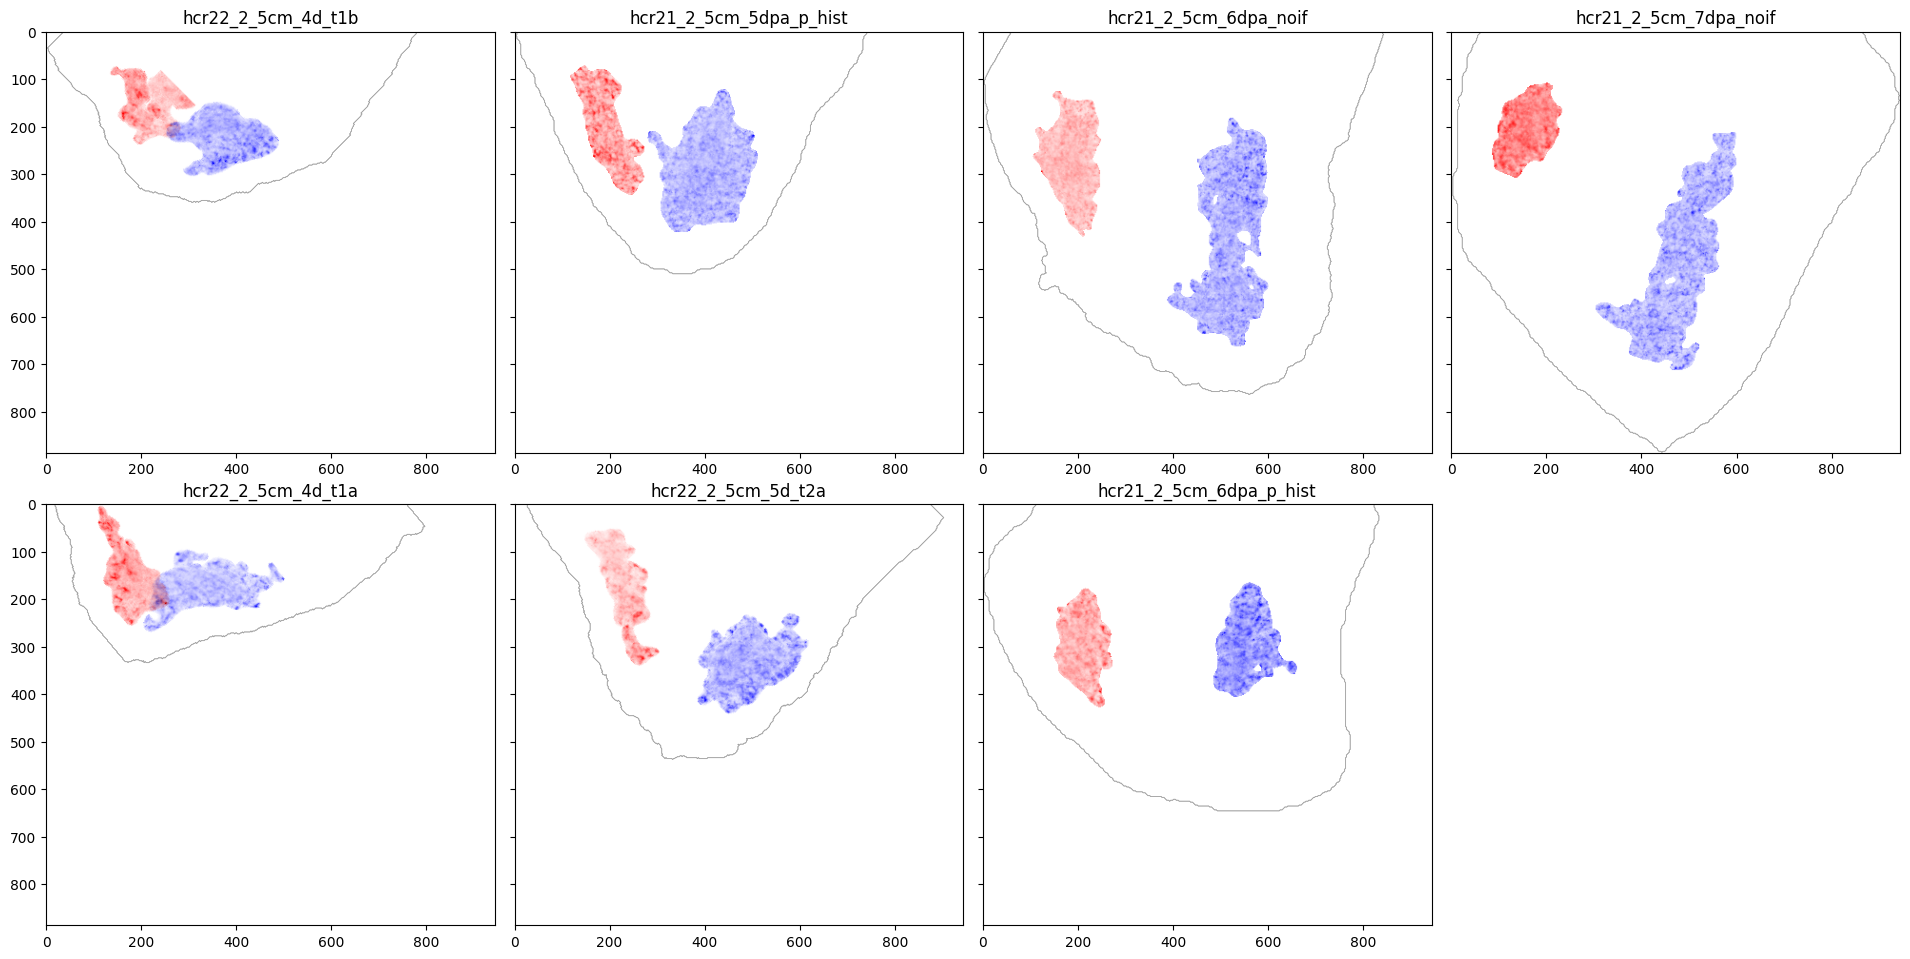

In [15]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('fig/2_5cm_blastemas.pdf')
plt.show()

## 5 cm blastemas

In [16]:
df_to_plot = df[df['Animal size, cm'] == 5]

In [17]:
len(df_to_plot)

10

In [18]:
keys_dpa = list( set( [str(h) for h in df_to_plot['Regeneration time, dpa'].values] ) )
#keys_dpa.remove('<NA>')
keys_dpa = set(keys_dpa)
keys_dpa

{'10', '6', '7', '8', '9'}

In [19]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['Regeneration time, dpa'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['Sample name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )            

        # mean projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:67: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:69: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


In [20]:
img.keys()

dict_keys(['9', '7', '10', '8', '6'])

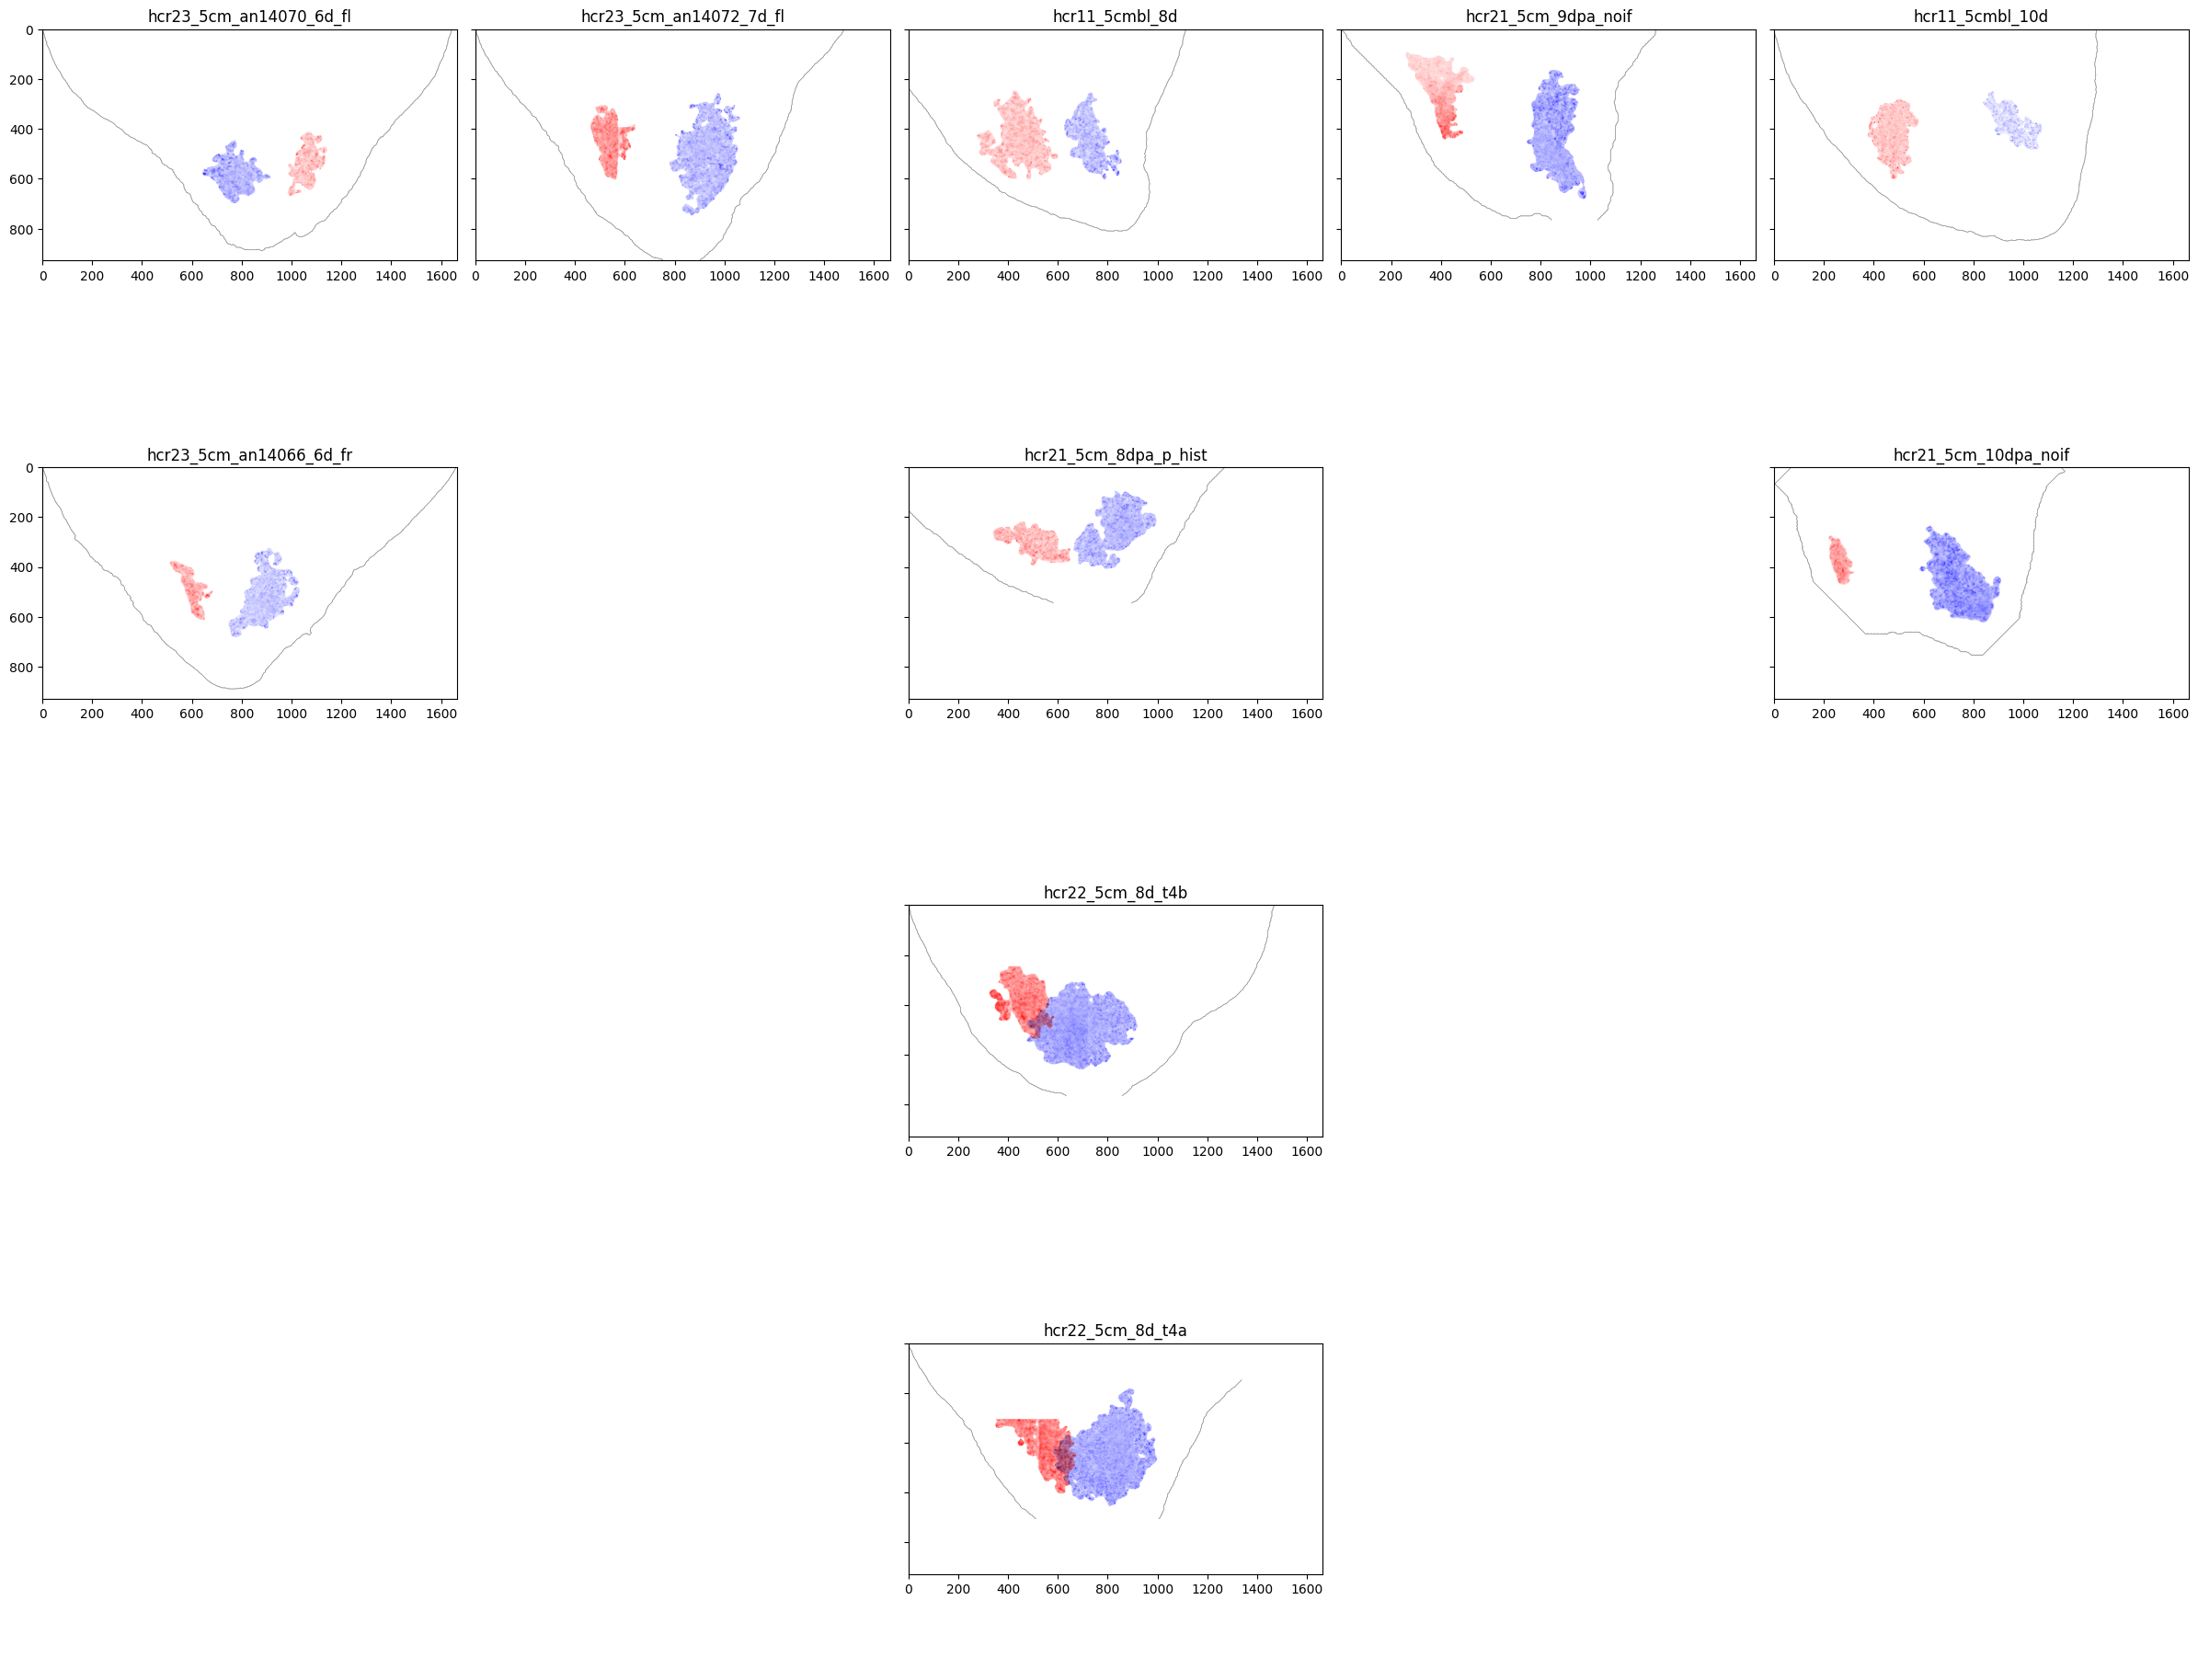

In [21]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('fig/5cm_blastemas.pdf')
plt.show()

## 7 cm blastemas

In [22]:
df_to_plot = df[df['Animal size, cm'] == 7]

In [23]:
len(df_to_plot)

8

In [24]:
keys_dpa = set( [str(h) for h in df_to_plot['Regeneration time, dpa'].values] )
keys_dpa

{'10', '12', '8', '9'}

In [25]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['Regeneration time, dpa'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['Sample name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )            

        # mean projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:67: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:69: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


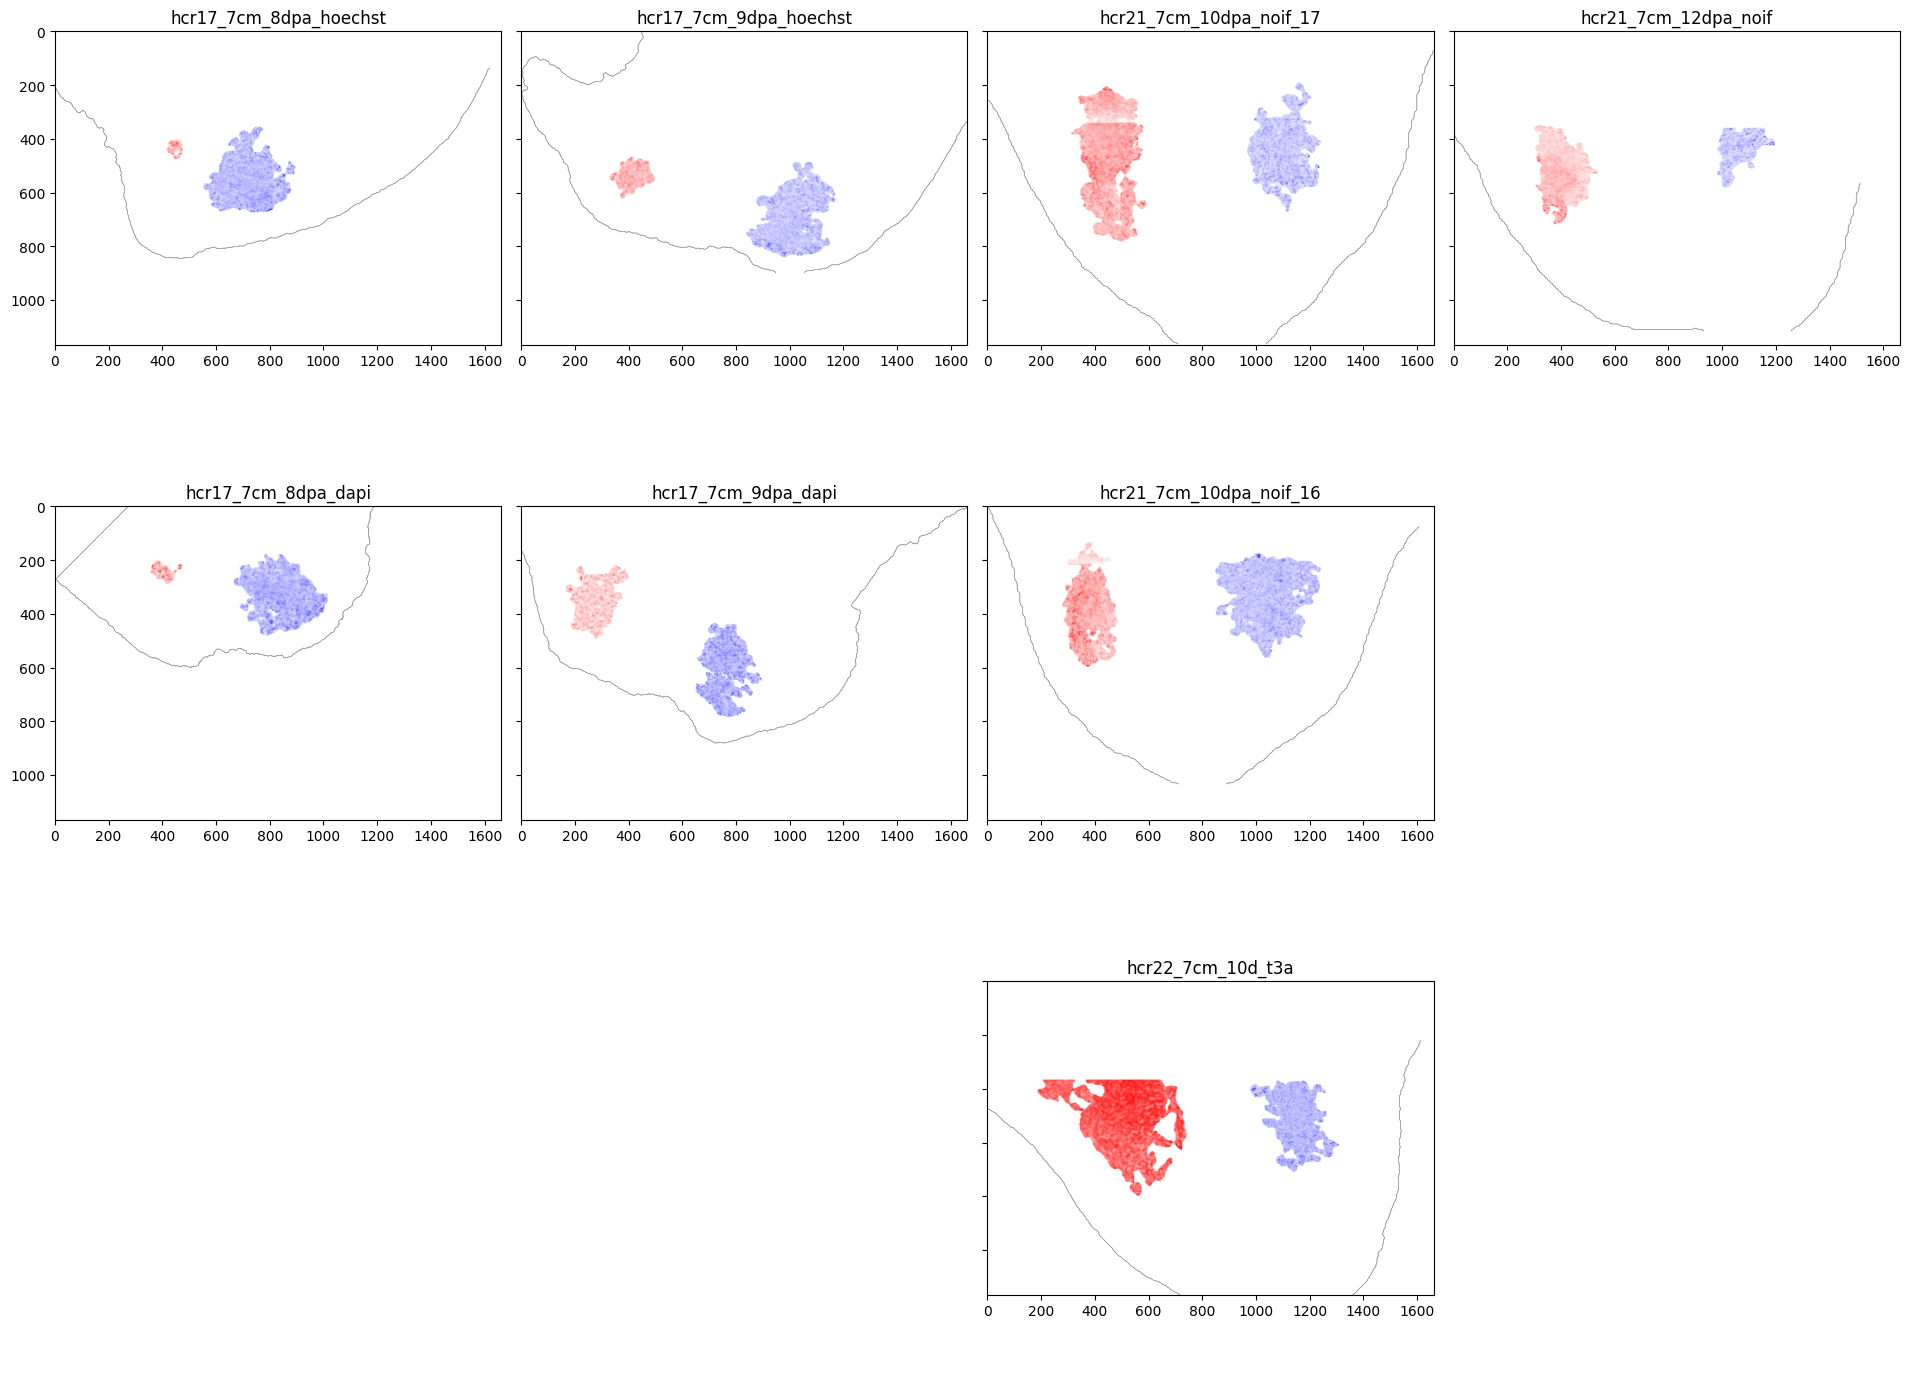

In [26]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('fig/7cm_blastemas.pdf')
plt.show()